In [1]:
import sqlite3
import pprint
import json
import numpy as np # imports a fast numerical programming library
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
#pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
#pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options
color = sns.color_palette()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
%matplotlib inline

Using TensorFlow backend.


In [2]:
!python --version
!pip list

Python 3.6.6
Package              Version
-------------------- -------
absl-py              0.7.1  
astor                0.7.1  
attrs                19.1.0 
backcall             0.1.0  
bleach               3.1.0  
cycler               0.10.0 
decorator            4.4.0  
defusedxml           0.6.0  
entrypoints          0.3    
gast                 0.2.2  
grpcio               1.20.1 
h5py                 2.9.0  
ipykernel            5.1.0  
ipython              7.5.0  
ipython-genutils     0.2.0  
ipywidgets           7.4.2  
jedi                 0.13.3 
Jinja2               2.10.1 
jsonschema           3.0.1  
jupyter              1.0.0  
jupyter-client       5.2.4  
jupyter-console      6.0.0  
jupyter-core         4.4.0  
Keras                2.2.4  
Keras-Applications   1.0.7  
Keras-Preprocessing  1.0.9  
kiwisolver           1.1.0  
Markdown             3.1    
MarkupSafe           1.1.1  
matplotlib           3.0.3  
mistune              0.8.4  
mock                 3.0.3  
n

In [3]:
!ls

data.json		     dschallenge_kmeans.ipynb  test_data.db
Data Science Career Path.md  LICENSE		       test_data.db.zip
dschallenge_keras.ipynb      README.md		       test_data.zip


In [4]:
conn = sqlite3.connect("test_data.db")
cur = conn.cursor()

In [5]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
cur.execute("SELECT name FROM sqlite_master WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1")
results = cur.fetchall()
pp.pprint(results)

[('customers',)]


In [7]:
cur.execute("PRAGMA TABLE_INFO(customers)")
results = cur.fetchall()
pp.pprint(results)

[   (0, 'customer_id', 'varchar(32)', 0, None, 0),
    (1, 'days_since_first_order', 'int', 0, None, 0),
    (2, 'days_since_last_order', 'int', 0, None, 0),
    (3, 'is_newsletter_subscriber', 'varchar(1)', 0, None, 0),
    (4, 'orders', 'int', 0, None, 0),
    (5, 'items', 'int', 0, None, 0),
    (6, 'cancels', 'int', 0, None, 0),
    (7, 'returns', 'int', 0, None, 0),
    (8, 'different_addresses', 'int', 0, None, 0),
    (9, 'shipping_addresses', 'int', 0, None, 0),
    (10, 'devices', 'int', 0, None, 0),
    (11, 'vouchers', 'int', 0, None, 0),
    (12, 'cc_payments', 'int', 0, None, 0),
    (13, 'paypal_payments', 'int', 0, None, 0),
    (14, 'afterpay_payments', 'int', 0, None, 0),
    (15, 'apple_payments', 'int', 0, None, 0),
    (16, 'female_items', 'int', 0, None, 0),
    (17, 'male_items', 'int', 0, None, 0),
    (18, 'unisex_items', 'int', 0, None, 0),
    (19, 'wapp_items', 'int', 0, None, 0),
    (20, 'wftw_items', 'int', 0, None, 0),
    (21, 'mapp_items', 'int', 0, Non

In [8]:
# Stage 1
#1. What was the total revenue to the nearest dollar for customers who have paid by credit card?
#2. What percentage of customers who have purchased female items have paid by credit card?
#3. What was the average revenue for customers who used either iOS, Android or Desktop?
#4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?


## Stage 1: SQL
### 1. What was the total revenue to the nearest dollar for customers who have paid by credit card?

In [9]:
cur.execute("SELECT DISTINCT cc_payments FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(1,), (0,)]


In [10]:
cur.execute("SELECT DISTINCT revenue FROM customers")
results = cur.fetchall()
pp.pprint(results)

[   (6946.34,),
    (5329.28,),
    (14133.87,),
    (143.64,),
    (0.0,),
    (63.59,),
    (40.86,),
    (186.32,),
    (774.03,),
    (16236.2,),
    (1710.67,),
    (5564.85,),
    (45.41,),
    (3393.47,),
    (4407.39,),
    (668.25,),
    (117.27,),
    (11424.83,),
    (3201.83,),
    (954.97,),
    (563.41,),
    (226.36,),
    (16590.07,),
    (15894.32,),
    (126.36,),
    (119.58,),
    (71.82,),
    (43.59,),
    (1976.13,),
    (198.94,),
    (1362.7,),
    (685.84,),
    (172.61,),
    (153.64,),
    (49.95,),
    (26.32,),
    (619.42,),
    (199.09,),
    (149.75,),
    (20.86,),
    (45.44,),
    (19.8,),
    (2421.98,),
    (3019.37,),
    (113.64,),
    (145.26,),
    (72.68,),
    (2916.68,),
    (114.9,),
    (15.84,),
    (1647.9,),
    (409.1,),
    (273.39,),
    (1178.76,),
    (2252.47,),
    (872.97,),
    (371.71,),
    (246.86,),
    (689.45,),
    (400.8,),
    (272.64,),
    (189.59,),
    (71.6,),
    (1126.88,),
    (66.63,),
    (365.78,),
    (1247

    (440.94,),
    (6756.35,),
    (138.04,),
    (187.22,),
    (94.54,),
    (172.72,),
    (601.53,),
    (294.56,),
    (2392.6,),
    (203.4,),
    (2388.66,),
    (280.35,),
    (257.2,),
    (1842.52,),
    (478.61,),
    (327.1,),
    (10320.42,),
    (61.76,),
    (148.36,),
    (612.8,),
    (1090.39,),
    (1043.47,),
    (5310.56,),
    (756.38,),
    (4988.65,),
    (1815.79,),
    (4121.65,),
    (183885.79,),
    (1580.52,),
    (499.9,),
    (4292.72,),
    (109.1,),
    (89.06,),
    (5069.06,),
    (649.5,),
    (1328.02,),
    (240.8,),
    (70.88,),
    (9678.02,),
    (3608.05,),
    (198039.14,),
    (509.62,),
    (272.31,),
    (2437.17,),
    (19.08,),
    (290.5,),
    (640.58,),
    (106.78,),
    (32.72,),
    (195.57,),
    (6340.4,),
    (137.06,),
    (2171.87,),
    (979.87,),
    (92.6,),
    (1117.78,),
    (4290.87,),
    (620.73,),
    (1194.17,),
    (359.35,),
    (2380.71,),
    (702.72,),
    (196.36,),
    (5611.19,),
    (129.35,),
    (926.54,

    (654.46,),
    (565.14,),
    (139.88,),
    (2090.74,),
    (1346.89,),
    (607.07,),
    (346.29,),
    (74.98,),
    (261.74,),
    (3596.55,),
    (2104.68,),
    (1940.49,),
    (429.36,),
    (115.82,),
    (6155.24,),
    (254.46,),
    (615.18,),
    (751.69,),
    (581.44,),
    (844.06,),
    (12310.22,),
    (236.3,),
    (213.32,),
    (921.73,),
    (4811.79,),
    (281.44,),
    (1504.02,),
    (130.18,),
    (384.45,),
    (1448.46,),
    (269.98,),
    (185.16,),
    (224.26,),
    (55773.11,),
    (196.18,),
    (2249.08,),
    (470.85,),
    (154.45,),
    (1958.0,),
    (87.27,),
    (1759.49,),
    (2378.16,),
    (1171.72,),
    (109.98,),
    (18129.83,),
    (29901.86,),
    (209.95,),
    (9744.52,),
    (2243.28,),
    (673.13,),
    (1562.43,),
    (1046.58,),
    (223.67,),
    (1736.7,),
    (911.68,),
    (332.28,),
    (686.1,),
    (3361.95,),
    (43.09,),
    (166.79,),
    (341.82,),
    (286.11,),
    (808.64,),
    (281.28,),
    (455.95,),
    

    (242.63,),
    (28.36,),
    (210.8,),
    (28.96,),
    (695.46,),
    (1248.36,),
    (880.71,),
    (1194.21,),
    (13633.92,),
    (675.47,),
    (30.93,),
    (2015.09,),
    (1086.54,),
    (689.71,),
    (494.41,),
    (77.19,),
    (519.86,),
    (747.18,),
    (14.51,),
    (432.51,),
    (622.34,),
    (401.56,),
    (1274.5,),
    (1112.86,),
    (1429.61,),
    (538.68,),
    (7664.53,),
    (7495.3,),
    (505.23,),
    (504.45,),
    (397.04,),
    (1796.16,),
    (89.5,),
    (1233.67,),
    (358.33,),
    (2702.5,),
    (64.5,),
    (108.48,),
    (116.28,),
    (59.08,),
    (1838.39,),
    (471.02,),
    (683.32,),
    (389.17,),
    (385.23,),
    (103.57,),
    (290.8,),
    (395.18,),
    (940.44,),
    (355.68,),
    (3703.25,),
    (3449.23,),
    (6906.83,),
    (407.97,),
    (457.89,),
    (245.19,),
    (381.44,),
    (267.21,),
    (7205.41,),
    (46521.56,),
    (794.08,),
    (292.55,),
    (124.04,),
    (725.76,),
    (7307.3,),
    (287.48,),
    

    (224.65,),
    (79.51,),
    (3746.99,),
    (3556.67,),
    (9371.86,),
    (2970.63,),
    (2019.35,),
    (289.09,),
    (158.45,),
    (966.19,),
    (865.04,),
    (46.76,),
    (187.09,),
    (286.58,),
    (746.94,),
    (62.66,),
    (2919.49,),
    (7411.27,),
    (856.94,),
    (256.04,),
    (2751.09,),
    (448.71,),
    (658.29,),
    (424.96,),
    (1199.78,),
    (183.06,),
    (12756.11,),
    (12819.46,),
    (11205.44,),
    (1072.12,),
    (248.95,),
    (204.27,),
    (3018.75,),
    (981.69,),
    (4279.78,),
    (690.36,),
    (518.15,),
    (1457.67,),
    (4247.64,),
    (414.11,),
    (722.56,),
    (1619.59,),
    (963.53,),
    (12.7,),
    (2631.31,),
    (4137.75,),
    (1275.29,),
    (83.88,),
    (278.85,),
    (584.87,),
    (190.91,),
    (795.97,),
    (10053.46,),
    (570.54,),
    (293.55,),
    (3029.86,),
    (3953.16,),
    (1105.06,),
    (2697.73,),
    (5518.94,),
    (64477.37,),
    (145.75,),
    (1376.54,),
    (371.23,),
    (249.91,

    (814.79,),
    (1460.4,),
    (316.18,),
    (219.54,),
    (159.09,),
    (455.82,),
    (626.07,),
    (411.48,),
    (3021.54,),
    (757.42,),
    (5356.2,),
    (192.56,),
    (313.64,),
    (701.17,),
    (92.25,),
    (72.76,),
    (506.86,),
    (72.66,),
    (318.84,),
    (144.27,),
    (162.62,),
    (3868.43,),
    (3030.01,),
    (589.52,),
    (73.54,),
    (398.16,),
    (596.91,),
    (159.08,),
    (636.04,),
    (17452.92,),
    (277.91,),
    (218.2,),
    (1136.21,),
    (687.92,),
    (1406.68,),
    (306.46,),
    (244.42,),
    (1271.42,),
    (2609.91,),
    (325.11,),
    (26997.95,),
    (1404.26,),
    (3523.63,),
    (863.26,),
    (437.11,),
    (351.38,),
    (248.96,),
    (347.71,),
    (105.37,),
    (199.94,),
    (1652.72,),
    (54.48,),
    (403.16,),
    (1632.56,),
    (2050.41,),
    (129.08,),
    (154.47,),
    (51.78,),
    (1355.12,),
    (9827.44,),
    (340.08,),
    (279.86,),
    (389.71,),
    (259.83,),
    (40.64,),
    (11.18,),
 

    (5439.83,),
    (3247.89,),
    (421.68,),
    (3331.34,),
    (412.76,),
    (5180.54,),
    (69.04,),
    (1133.81,),
    (961.3,),
    (303.41,),
    (11386.23,),
    (39.93,),
    (264.8,),
    (1258.66,),
    (173.55,),
    (356.91,),
    (239.04,),
    (1196.35,),
    (3945.04,),
    (109.07,),
    (248.59,),
    (147.18,),
    (327.15,),
    (222.59,),
    (716.02,),
    (11122.14,),
    (697.46,),
    (314.36,),
    (598.73,),
    (2326.39,),
    (304.12,),
    (741.7,),
    (1033.13,),
    (2827.2,),
    (1565.61,),
    (358.97,),
    (5082.84,),
    (944.0,),
    (1270.65,),
    (10537.69,),
    (239.19,),
    (722.23,),
    (1736.85,),
    (370.39,),
    (693.21,),
    (687.0,),
    (269.35,),
    (2091.68,),
    (2568.02,),
    (586.05,),
    (621.66,),
    (1629.1,),
    (2763.18,),
    (276.52,),
    (452.48,),
    (656.28,),
    (4116.45,),
    (457.1,),
    (805.26,),
    (177.95,),
    (137.27,),
    (206.27,),
    (728.69,),
    (336.41,),
    (12376.23,),
    (29

    (2197.48,),
    (182.14,),
    (4150.4,),
    (459.9,),
    (161.7,),
    (476.03,),
    (3884.79,),
    (385.0,),
    (551.74,),
    (1605.47,),
    (51.98,),
    (5417.95,),
    (873.33,),
    (426.16,),
    (250.72,),
    (3926.58,),
    (972.04,),
    (474.84,),
    (19.6,),
    (833.4,),
    (1803.12,),
    (2731.7,),
    (737.17,),
    (374.5,),
    (3648.18,),
    (164.8,),
    (482.61,),
    (2258.02,),
    (1662.75,),
    (527.45,),
    (196.2,),
    (9683.87,),
    (350.0,),
    (81.91,),
    (138.98,),
    (33991.39,),
    (576.94,),
    (386.97,),
    (1472.05,),
    (381.62,),
    (39.2,),
    (876.04,),
    (1265.6,),
    (654.85,),
    (788.19,),
    (251.63,),
    (1831.32,),
    (172.73,),
    (1731.2,),
    (3420.59,),
    (1801.52,),
    (803.12,),
    (8089.39,),
    (517.7,),
    (22.26,),
    (638.34,),
    (500.84,),
    (631.53,),
    (115.04,),
    (1857.28,),
    (407.2,),
    (523.6,),
    (330.31,),
    (401.6,),
    (503.25,),
    (1968.08,),
    (312.6

    (520.55,),
    (749.89,),
    (137.13,),
    (5106.36,),
    (1329.66,),
    (544.72,),
    (935.35,),
    (2413.36,),
    (346.2,),
    (151.89,),
    (585.4,),
    (6817.86,),
    (477.12,),
    (2067.24,),
    (5051.44,),
    (213.61,),
    (1486.5,),
    (155.34,),
    (570.7,),
    (596.59,),
    (2760.67,),
    (4148.31,),
    (60.48,),
    (304.7,),
    (78.75,),
    (2845.35,),
    (297.84,),
    (6551.31,),
    (816.55,),
    (3592.24,),
    (311.6,),
    (734.6,),
    (150.16,),
    (138.02,),
    (2176.6,),
    (34.04,),
    (546.57,),
    (69.87,),
    (310.32,),
    (228.14,),
    (3945.66,),
    (272.44,),
    (1735.91,),
    (1694.0,),
    (1827.95,),
    (436.11,),
    (339.86,),
    (305.63,),
    (299.13,),
    (2367.86,),
    (884.95,),
    (118.29,),
    (7461.35,),
    (263.41,),
    (322.45,),
    (1232.94,),
    (12090.76,),
    (751.89,),
    (2297.62,),
    (38.99,),
    (255.19,),
    (2079.63,),
    (3246.14,),
    (690.48,),
    (1153.05,),
    (245.35,)

    (4596.92,),
    (39.26,),
    (899.48,),
    (163.53,),
    (5142.23,),
    (216.67,),
    (307.98,),
    (248.89,),
    (3403.76,),
    (23724.0,),
    (7692.3,),
    (1672.08,),
    (6126.54,),
    (115.52,),
    (135.3,),
    (955.46,),
    (7262.66,),
    (490.52,),
    (1098.88,),
    (2188.7,),
    (808.51,),
    (229.93,),
    (503.91,),
    (1158.93,),
    (276.18,),
    (776.51,),
    (160.72,),
    (827.49,),
    (1094.79,),
    (788.6,),
    (654.05,),
    (427.99,),
    (237.98,),
    (24750.78,),
    (453.43,),
    (36.26,),
    (474.38,),
    (260.36,),
    (442.53,),
    (52.62,),
    (358.93,),
    (531.66,),
    (434.4,),
    (646.73,),
    (1634.97,),
    (2354.71,),
    (2187.47,),
    (432.48,),
    (2163.98,),
    (544.08,),
    (923.12,),
    (1646.19,),
    (9400.16,),
    (869.46,),
    (572.57,),
    (5742.69,),
    (827.57,),
    (1602.6,),
    (482.45,),
    (6281.02,),
    (161.58,),
    (2881.83,),
    (714.66,),
    (385.25,),
    (1308.03,),
    (623.

    (1998.46,),
    (1767.56,),
    (1754.75,),
    (3219.07,),
    (5969.93,),
    (977.04,),
    (817.67,),
    (2337.97,),
    (969.81,),
    (821.32,),
    (1709.57,),
    (900.49,),
    (226.74,),
    (674.58,),
    (2027.52,),
    (201.72,),
    (6865.74,),
    (2235.72,),
    (981.28,),
    (3505.92,),
    (827.19,),
    (909.93,),
    (554.08,),
    (304.38,),
    (363.42,),
    (2111.4,),
    (417.95,),
    (1195.65,),
    (1524.87,),
    (166.14,),
    (5248.08,),
    (6376.52,),
    (4803.62,),
    (726.24,),
    (188.14,),
    (116988.97,),
    (945.36,),
    (161.77,),
    (5236.08,),
    (1344.73,),
    (453.89,),
    (4213.32,),
    (711.7,),
    (794.28,),
    (1596.16,),
    (2446.38,),
    (381.46,),
    (349.53,),
    (1035.6,),
    (121.66,),
    (392.94,),
    (1327.13,),
    (305.25,),
    (1242.65,),
    (754.59,),
    (796.1,),
    (1373.13,),
    (1036.47,),
    (92.27,),
    (354.04,),
    (285.0,),
    (92.71,),
    (2283.09,),
    (1635.11,),
    (82.95,),
 

    (772.05,),
    (439.51,),
    (3681.81,),
    (402.44,),
    (1066.55,),
    (680.22,),
    (143.07,),
    (494.22,),
    (41.82,),
    (2348.19,),
    (1883.23,),
    (541.6,),
    (3958.96,),
    (55.6,),
    (429.33,),
    (599.99,),
    (952.08,),
    (6191.26,),
    (248.45,),
    (2616.19,),
    (436.02,),
    (238.19,),
    (101.31,),
    (554.19,),
    (879.05,),
    (572.49,),
    (1280.55,),
    (1997.76,),
    (1406.56,),
    (459.0,),
    (1845.59,),
    (359.93,),
    (2197.29,),
    (1586.82,),
    (177.24,),
    (272.63,),
    (726.29,),
    (436.16,),
    (359.53,),
    (529.04,),
    (192.03,),
    (575.82,),
    (325.69,),
    (276.82,),
    (763.25,),
    (673.65,),
    (152.09,),
    (149.73,),
    (573.99,),
    (586.04,),
    (3063.67,),
    (4356.57,),
    (250.35,),
    (12504.73,),
    (217.56,),
    (16621.33,),
    (322.98,),
    (181.13,),
    (4004.81,),
    (575.22,),
    (3214.93,),
    (1981.68,),
    (1341.6,),
    (3648.54,),
    (571.64,),
    (95

    (2377.29,),
    (1032.18,),
    (315.72,),
    (417.2,),
    (1360.19,),
    (320.33,),
    (2327.98,),
    (466.45,),
    (380.29,),
    (1701.48,),
    (8123.78,),
    (1349.17,),
    (5440.45,),
    (537.42,),
    (2127.97,),
    (345.4,),
    (3134.75,),
    (60.81,),
    (409.14,),
    (932.76,),
    (568.55,),
    (2097.88,),
    (6755.22,),
    (14873.14,),
    (744.85,),
    (3031.1,),
    (999.05,),
    (232.92,),
    (1042.73,),
    (294.44,),
    (5753.08,),
    (5919.64,),
    (310.62,),
    (2178.33,),
    (550.45,),
    (113.61,),
    (370.26,),
    (2458.01,),
    (1124.04,),
    (1756.28,),
    (1244.55,),
    (526.22,),
    (336.11,),
    (3901.67,),
    (1046.92,),
    (536.77,),
    (229.46,),
    (283.29,),
    (2237.95,),
    (1270.09,),
    (310.51,),
    (116.96,),
    (1166.13,),
    (1601.99,),
    (222.18,),
    (2945.02,),
    (184.39,),
    (436.26,),
    (823.98,),
    (3165.99,),
    (462.55,),
    (5156.6,),
    (185.43,),
    (768.4,),
    (1133.88,)

    (374.93,),
    (49650.95,),
    (104.46,),
    (372.54,),
    (2086.37,),
    (115.08,),
    (3581.4,),
    (6737.93,),
    (13677.81,),
    (72.48,),
    (5035.65,),
    (545.32,),
    (1630.57,),
    (371.89,),
    (1322.7,),
    (627.09,),
    (3495.72,),
    (183.41,),
    (5723.13,),
    (4407.0,),
    (926.16,),
    (1395.14,),
    (7068.54,),
    (1195.91,),
    (151.98,),
    (939.71,),
    (1509.22,),
    (222.08,),
    (953.88,),
    (327.12,),
    (1927.16,),
    (4436.1,),
    (1256.57,),
    (240.86,),
    (87.95,),
    (211.2,),
    (458.94,),
    (235.08,),
    (476.33,),
    (627.85,),
    (854.19,),
    (111.92,),
    (618.61,),
    (599.61,),
    (277.15,),
    (3068.22,),
    (1537.14,),
    (1132.58,),
    (445.1,),
    (35563.88,),
    (755.75,),
    (296.24,),
    (35.8,),
    (1847.92,),
    (378.02,),
    (674.47,),
    (2609.15,),
    (1205.24,),
    (675.15,),
    (1095.91,),
    (2078.39,),
    (5255.85,),
    (68.57,),
    (1308.36,),
    (450.0,),
    (

    (500.69,),
    (306.52,),
    (3385.69,),
    (2315.81,),
    (2301.33,),
    (2262.68,),
    (587.64,),
    (196.73,),
    (1603.37,),
    (3989.16,),
    (1923.02,),
    (1456.26,),
    (6477.07,),
    (931.28,),
    (884.96,),
    (2453.73,),
    (7831.46,),
    (3452.51,),
    (4219.99,),
    (1981.0,),
    (6496.19,),
    (5396.84,),
    (848.81,),
    (184.51,),
    (1704.7,),
    (5390.3,),
    (984.12,),
    (418.36,),
    (1969.1,),
    (4384.34,),
    (7880.69,),
    (24.25,),
    (462.46,),
    (24.24,),
    (1616.09,),
    (563.12,),
    (1504.17,),
    (1172.87,),
    (1936.11,),
    (794.35,),
    (899.41,),
    (2390.62,),
    (981.1,),
    (1337.56,),
    (258.97,),
    (512.7,),
    (9993.28,),
    (697.0,),
    (4532.83,),
    (2126.52,),
    (1077.02,),
    (175.88,),
    (1413.49,),
    (2924.2,),
    (402.93,),
    (749.93,),
    (877.03,),
    (2836.45,),
    (334.2,),
    (1675.7,),
    (3141.55,),
    (6889.06,),
    (123836.35,),
    (712.41,),
    (454.24,

    (6581.45,),
    (2077.93,),
    (905.45,),
    (128.86,),
    (400.04,),
    (552.37,),
    (640.51,),
    (2702.88,),
    (1236.0,),
    (1543.0,),
    (87.06,),
    (197.92,),
    (6179.64,),
    (10328.85,),
    (1312.97,),
    (702.54,),
    (389.88,),
    (2693.22,),
    (3681.56,),
    (1180.41,),
    (978.13,),
    (583.19,),
    (658.8,),
    (87127.51,),
    (501.32,),
    (909.38,),
    (5851.99,),
    (150.36,),
    (68.77,),
    (2227.29,),
    (545.22,),
    (1536.98,),
    (166.2,),
    (1185.52,),
    (1122.2,),
    (1006.32,),
    (328.23,),
    (417.23,),
    (226.56,),
    (861.82,),
    (9763.71,),
    (1042.35,),
    (7122.58,),
    (87.5,),
    (2249.98,),
    (1233.98,),
    (681.19,),
    (608.72,),
    (1807.34,),
    (1253.88,),
    (1861.72,),
    (322.49,),
    (6445.41,),
    (193.0,),
    (868.54,),
    (3615.32,),
    (1353.77,),
    (1235.84,),
    (1658.35,),
    (94.24,),
    (7761.85,),
    (11544.85,),
    (5099.75,),
    (1801.77,),
    (55814.16

    (319.78,),
    (377.01,),
    (1277.33,),
    (1235.01,),
    (1999.36,),
    (390.81,),
    (4096.32,),
    (769.31,),
    (759.46,),
    (325.1,),
    (2340.59,),
    (358.91,),
    (566.52,),
    (13012.0,),
    (79.49,),
    (611.86,),
    (2961.64,),
    (590.51,),
    (155.88,),
    (261.52,),
    (950.11,),
    (5919.58,),
    (269.89,),
    (4733.82,),
    (1154.23,),
    (1471.88,),
    (1447.78,),
    (3563.05,),
    (568.36,),
    (2412.59,),
    (657.52,),
    (341.69,),
    (663.53,),
    (1087.5,),
    (544.39,),
    (445.36,),
    (964.28,),
    (82.14,),
    (2561.24,),
    (977.72,),
    (5438.61,),
    (3656.68,),
    (848.84,),
    (222.91,),
    (2005.2,),
    (2257.6,),
    (2396.05,),
    (1078.11,),
    (575.93,),
    (19899.19,),
    (551.54,),
    (2708.82,),
    (863.82,),
    (572.47,),
    (9916.53,),
    (671.97,),
    (2521.48,),
    (398.64,),
    (261.81,),
    (222.54,),
    (465.29,),
    (167.64,),
    (349.86,),
    (6493.65,),
    (125.04,),
   

    (190.66,),
    (329.41,),
    (707.99,),
    (408.09,),
    (2056.97,),
    (97.46,),
    (238.27,),
    (16857.05,),
    (215.28,),
    (24183.16,),
    (650.67,),
    (381.6,),
    (2556.21,),
    (803.21,),
    (355.17,),
    (239.55,),
    (1011.27,),
    (986.2,),
    (315.46,),
    (104.91,),
    (2784.39,),
    (307.97,),
    (2308.19,),
    (972.24,),
    (2135.36,),
    (174.31,),
    (3276.04,),
    (1786.65,),
    (2218.86,),
    (243.18,),
    (1889.73,),
    (2027.55,),
    (1353.24,),
    (917.75,),
    (358.12,),
    (974.72,),
    (4436.77,),
    (6044.77,),
    (194.12,),
    (1052.12,),
    (726.7,),
    (6527.44,),
    (2223.32,),
    (455.46,),
    (1771.74,),
    (539.2,),
    (798.03,),
    (578.69,),
    (1320.55,),
    (3672.17,),
    (1864.02,),
    (6012.19,),
    (462.44,),
    (2426.94,),
    (17381.32,),
    (1678.53,),
    (198.14,),
    (857.3,),
    (257.02,),
    (2364.47,),
    (467.72,),
    (382.91,),
    (175.25,),
    (3574.56,),
    (340.45,),

In [11]:
cur.execute("SELECT CAST(ROUND(SUM(revenue), 0) AS INT) FROM customers WHERE cc_payments = 1")
results = cur.fetchall()
print("$%d" % (results[0][0]))

$50372282


### 2. What percentage of customers who have purchased female items have paid by credit card?

In [12]:
cur.execute("SELECT DISTINCT female_items FROM customers ORDER BY female_items LIMIT 5")
results = cur.fetchall()
pp.pprint(results)

[(0,), (1,), (2,), (3,), (4,)]


In [13]:
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items IS NULL")
results = cur.fetchall()
pp.pprint(results)

[(0,)]


In [14]:
cur.execute("SELECT COUNT(1) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46279,)]


In [15]:
cur.execute("SELECT COUNT(DISTINCT customer_id) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46030,)]


In [16]:
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1")
results = cur.fetchall()
pp.pprint(results)

[(22588,)]


In [17]:
# Ignoring underlying errors in data
# Rounding result to 2 decimal places
cur.execute("""
SELECT
ROUND((SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1)
/
CAST((SELECT COUNT(1) FROM customers) AS REAL)
* 100, 2)
""")
results = cur.fetchall()
print("%.2f%%" % (results[0][0]))

48.81%


### 3. What was the average revenue for customers who used either iOS, Android or Desktop?

In [18]:
# Rounding result to nearest cent
# SELECT MIN(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT MAX(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT AVG(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
cur.execute("SELECT ROUND(AVG(revenue), 2) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0")
results = cur.fetchall()
print("$%.2f" % (results[0][0]))

$1484.89


### 4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?

In [19]:
# Including customers who purchased unisex items as they have potential to purchase 
# SELECT DISTINCT customer_id FROM customers WHERE
# male_items > 0 OR
# mapp_items > 0 OR
# macc_items > 0 OR
# mftw_items > 0 OR
# mspt_items > 0 OR
# unisex_items > 0
cur.execute("""
SELECT DISTINCT customer_id FROM customers WHERE
male_items > 0 OR
mapp_items > 0 OR
macc_items > 0 OR
mftw_items > 0 OR
mspt_items > 0 OR
unisex_items > 0
""")
results = cur.fetchall()
for customer in results:
    print(customer[0])

64f7d7dd7a59bba7168cc9c960a5c60e
fa7c64efd5c037ff2abcce571f9c1712
18923c9361f27583d2320951435e4888
aa21f31def4edbdcead818afcdfc4d32
5f1e0812c41be939d971e34236d4de5b
7dae973c589d913f4ca4dacbd37feedf
10bc5715ecec307441b3b4f378e58592
040fb9742f9e14cf69c7a748bdf20137
1936d9aa913e7a12e24af56c096419ca
9f3e6357fdcd178344772cff6d720cee
4167f9c83bfb97a15223bb729b79b5ac
d439bd758fd2f20aca559a60a53a3b69
80c9b38e5638695e5f65b51399442d44
a097c876345ce11d7e3df4e6a99ca07e
37f5af5042258835bb444eb120265259
afa13bb87aea37914c2570eab1695772
980f142f64c8b622f8274355d4356249
c065a3d911bc0492f42e66de35fd5896
e59717d9ec9c62b7966cef921323948a
2615678b8425cf1a9dd4989595be806a
fc048d57b9e901b940b1f5d165b66e14
31ac0de2152e591608daed9114ec8c08
5a339c04693983ab438f112ec287bae1
7ff8e4063a65e668de93d4aa6f688a8e
31b0695deee2d28cf3a9036c506abffe
24765a179970d76f89cfee9817eaeacb
3bab4d96725c813432c2ed4549cde8b5
c1247f69d37ffd757d28447dfd7bb7b5
35c1cec0fca55772fb0dfe69339776ca
048c683b41778df6a766c2289b2eb174
a3d5224086

2bb564270dce7acd4f9d08d1100abaec
28d227ead5fd11c2e7b72206a472bf87
7484815ce9ce87190d990cbe5bb86fb0
e3160eb1989d776a861c7334705af292
cbc1b7a2ef1abb5e3c8340c0a9653293
118a786d05f9074fdf05781b61087d4c
dcdc09cfa61768879c9641a4f183b445
31980f12754d6aa0681bd401321ece21
964a5d9275e073242f965b25d9214002
919d869e6a294b5dfa89b12d3845b64e
bcd8441a829fad26d80302ecc2051c57
37030f5c9d9c88ca8c54999e0a2f5f9e
342a8547b44a756671a195cf00d50024
05014878511cced8fa4ce3637b1309f6
86a743c3f41c879431354be0811af64d
54bb6c91418bcb19a54e93b7c2e0c388
68d857fd4cdf41a70e9d568779a358a6
03ef19c9f93b0755c9002b603f8ced12
8f1c320c3220c2da81dc4bc16cc30217
02f7b54899e7d0fbcc9c70116962099e
1c1c6c758f3845e9c507dd90b650d5a2
e69369c918d93cde5d0cec51645f67ea
78267e83c593f0f4bb788d4130bdbffc
493a52fc2944ec2cd39bc12f68a837ee
edad3ccccf6a9f9387f24ac9b932e471
314e4dc4fa1fe05ad243f5375f88570c
e50fe35bc4f9f1bf3b3128ebbadf15fc
29a4fa96961b20ac190891968ce7d36a
b3013545da7eba396bec38b508786a66
d0ae7b21017eb91fa552e82b374fda8e
0197493b85

07bbed9ecaf9d3e56c2fdec692421b38
ef44c656be29dee2e3ebcc0df6cdc477
6c0f1cd726d039a1ffcc97b2c1943d49
f4494656d33593727af79031505c0d92
45209310ecb4b8e6eaff9c64adb7a272
a3e504bbb5b35cd7b8a62e2847bdfda4
10d161743623973d68915f9daa2b124b
942e682f4e6dc6b1999ce7a47835a45d
a9c319634ad4367ee76e3a38513a12af
41a767c8e344430fa7f45a71d48bb457
8f271a5db2e688801e252662e51263cf
48f2e5a471b899d0077f77bcb7e81215
3a8b8c93cfbcd165991a59ef26199960
1e9bca6c871a5a2ab87cc67c9771b8a6
c01dde061e7f8aa05209eb72870b88d7
c4f10cd6bbf4e4dcd1c9c267c4aa3e19
f795dfe06ef787ce7ba95aa6e0a25a38
cd9eb2a622db396f5de206cd70f7dcc1
b70753806e9c9dcb06c46c3286897e24
957b5a9d2cd6e7c1f0812560a5781a80
ba9e88ddf85551230439b565ede1e4e9
59833ff23cea3d7bbfed426075b995c5
e2bc44a8f1f416f354d88fcf58e0c3d7
22c922257bf2fa86e44415cb8aa5edf8
879dc019a8bff657b138c82b3acb9266
d09eaa242595b4af566d651664f9f3a9
c7030cb582b1575e18208e5a01b4e115
b05b0e1da350ee375965c8490e1522c7
b1d81a0826fb7c7bd7be5601139d2964
bc88443d2e10ce7e706c4b4400c7cde0
2441a9097d

deda95731d09b0923c613f23a2adfb05
fd6f2e9637344a9a47f4fb62223d317d
257aac269b0ff2ee820e6812ba204513
c4b4c36e0cbd73190b380e4b727251eb
9a2fad9efb012cedaa5831dc649e8cc6
70b881fe4b04f29e2365ea4fae73d09b
e7b45b1299de94a4ec990fa6a57cc2bd
a5024674dec3f02b1fd790c74f8ae210
8969efbdd0082255acf1950955a5e8a7
c896a99c2149f3f0ed36d78a3ff30970
ed8d536fbc31ffde198d98ab18a83d6e
eaf62f9bd842072afa9eeec0dc569564
7079ee0f7d145ed7d32bc83273efee2d
e4c5307a3d1940dbd504cbfce7353e58
d75f257d16aa91847dd522f24e65a4cf
73d4520c2f1074fb2d84d7093d5e358e
28427cf16e36b7506d8d934c863f7322
47c4134cd1ef2fa5b45bb04d06ce0592
e59d1b5e584e149ab7767150e0c7a840
79303c4aae1e0df374e0bcb9a4001bd7
43d8a825e91f2a3bc620fab0898fec81
0b5f3301238eb1079f88ce8ccdd67d01
efe455b0ee829d2eb7b4b753693809e6
7cdc217467c9341b74fbda0c205e0a52
22416e16941ac8a22bba0675547bba4e
4a98761a7c588b83cf41be0bf98e182a
84d367b49d90f9c2f5c95a6d60b7de13
33feae94a0d7d9397445acb2bf9ced01
d879c70d150414c7f2dc42f0972ea062
c53281d0c61377396266d4b6fa8f43ee
13c2caaec0

59c9effe859ffdb348ec57022c55f15f
df69b77616fc19a05100225bae1910ad
0f523fbc0ccf0b3e6e2690f90855badf
1645d18b5889db8ae732251e44cc21e9
f33667e63e1818bdb96ec4f225df4cce
ee12bc716e8c512eb2425e3560ce7a56
8c7bd9c98a01223532c3615a4943f2c7
23ff40049edf09bcd8024f9f7683384c
ffc2f36b756ef1265c841f179dfa0b1d
eb8965913d70945a7cbe6f9658e559af
7043a86b332e3957aa413027b8c560ac
669ad7db6c3a947b6dbf22ef3c1f5fb3
45465b19c7e1f06f3c5d2ed71214bc6b
36a1e4bf112d58c4f99dabf981d5d017
dc9776d06cb73ba0c688e2722c3f8cd0
999718296ebd92f78ad1449abc4b5058
ba4e9f69ac0eef9b5cf3f546e0ac4674
133a2298c00aab9afbfbbf479efd9e64
6d6e72f066402efe859f3822d9c0cb4e
0b887d72062931fc991c4bd69fd9d4e7
f95d997d039f8f8de83af3e74556f8f0
e537a8d572d565ab43c850d935d8c59d
4bf46fdcbefc5555a758f82f93e8990e
46a0f3ed058ec9383b861e0b1591104b
a825aa261ee156b5f4e629d3bb8fa1ac
153135eed184b35efbf0f44e363d831f
f700e55213483acb25664624d938e6f8
0f6abae040a107c33a6f75013efc67b8
652a1c7577358aceb22d84de8534b48d
2fb8f6c4d2bc2ff963631cc954a5c4ef
ce8a0c3478

0d02de33abd98b995d3785380971bdc5
b89f90b05eddb3c33423daa026840857
1859e0c0ed7a123f8da9895890ef5017
12dc7b62c88b34b7139282b5bb46842c
2da24c1ffaa3c622a5be66ad79f547ae
db412f2a46572bb3471e2cec540154a8
3a82e65c1f0c56bdf03fec2be299555b
22e918c7e9d311f1328e21ec94e5b9d5
c20c1471fdc9e9d97667cf85b40d89c0
71b554793439b23a25da638bf162ec65
721a2a24a5df6c5544bce6cab5c5c47e
6e4830bfacaae21170f4669cbf56b99a
eaa767b7149cab141bc10219f258f1fc
1b604ce9f3ea7f800085dabcedb37274
ca0117060bec773314c503d2c663ae51
a82b308180766d8cf413304c817b7a1b
d375168c435b182ec21277f73dd318fe
2a833a91b10eb0051e1cbf1a7b7cfe47
650dc2caa87855bc9ea5eeba0432a1ab
40a323c78ed4fa73bb176697e0a76bfc
283b7d6486356a22e544d4f67b52d6e4
f8db26f9ae6e649a54e22c758a17de5d
638ba8b685575693647098e5f32ed94b
467d4bf58da7894cfd149f4497b8a96c
661f76cf5a923d6563f6ab47442fdcc2
7126dc76899d4e52b4817bccc0a27dfe
bda3f5be68ef5433496ec344ab26c29a
e07d9c27f081f5c60470f73f7f31dbc6
5abb318332b666a0cf38f4e5467b87af
6ea7574d35874208f531e9658f7a32c1
c0cd629231

2ffb9723ba0b3a956e6ad17dc378d559
07e6301b9497f7e87cdd6a042b270b2a
882a81a25cc7c185f054dc091d456606
dc4dd18ae90b7b202c5bd14196270845
c2bef74be5e5d8260be1587d6500edbc
7541dbecf6a46ee7391afb773e8af270
eb6122e12f23ee887bbe23468c43a27b
f6c53e51be22473ec322c0842eb94b2d
cee11a6be3d998ad544a7ca0fe787422
fccbc33636c81f04a4a19ef8e0d1f194
36994c20267dfd1d62583a98387af328
4ea28f4f62ff0f5266e8ab3d9be49387
ca4f2fbece3c13045a63ae214ddda3f8
738acbfb3cd9260707a1ae72eedf9340
81a65e94298f6fb337df9517894ce47a
a1b80858922af4af12a0ecaa2f37b2d9
a0984446043ce294e18d34690b7e9445
fad36ce4db1d576a342882584bdbbb0f
4c7c6019434bc6585115d1836a863939
8ca2cbd9ca63deeb06a07e86d47046c1
947555f28d676c38f335cdab47724539
284b9161fa085183854ac86b020f9a5c
649774bcfbc5f10d1ffcc9ab62c316a3
4c3535d4d4dff2c4b7ab26fa7ad2d4dd
3a9c61b8d74ece4818cb450877466503
4b0bc62c407875a7d722859bc864334d
e080a519c32c4016818cf2a732bcd2ca
e98c956fcbfc661f1c9c2c89c2661ea0
1d36203d11aed94ae07d0ff8ab9c0e21
761b8cbf0f4057397f5112aa71238d99
b811a194d6

3f3101107bec77fd0e3787f28aea882d
34cb3906423201573790645d88e9c3f2
ca39c95f6791be5f827db1957cbf5874
e63281a3db6611c1bc9049918f276f5b
d7f3a8786880952ed442ce64768bd5ea
ab830bb521135b2542473a21543d3dcc
bbc9549765ea2f256a46d889188cfeca
a5b7961a1a0b7af7ad7e8542628b08cf
4b5ec564ca0c2be611b3ef21f57c8491
b44095dd48f90e21ff2dd97bd576745b
bdcbabd86f30303a758cdf80a7b3faa8
404035462f9c248f37bb6e958c3ba8ba
cce890cb8f44b83353d4b4889083b471
2e36c2f9df54cfbaa6c0babbc9a77386
aa16152edc6e57b855a18c3b88dbe734
2ef0ad7e113465605bc1851cbf3c1c36
c40e6d745e2ca9e8e4b069320a5036d0
092acf42ab068145e3b6d830803643ad
c2c508eb5309fcbcceb1b82cd629093c
c23c79f28b0ebfb191a223ccff599e58
cb59818d9b20cee85a17d94b8266d79c
b0268d94aa3c6b4608037ca7eefa7f53
b6c068b7299c9b47528ae6718a9de055
17fb6f02eb0085f7f2cb10208564ebdd
0733d3ade33a44c40ed02615e6efaff9
0768afe33724b209f8965b4f7b80c110
ff513c22660a6506d6ddf43e46ffe44a
85e2d5eb72c6e710dd131b71e8fddbee
6f2d6c05c691934040fb8678671aaaf1
9d168aa3dae981dec738281934b50304
20b3a2f267

43498bf16e1341210efd290c2a25f0f9
8634f7f42ff8a840077aa8915326280d
ae6ad34c81b2be1fa2711b8099f05a9b
8437f40d40f28b6ca3ca69bdc989f495
3104f760b3e44510fe96dc87b57a306a
32f4c54c2f5f89d9081892928ffa83b2
5dfa69b8d91382bf1b850e293fd48f6d
104307e76614c42de9c52ad7ff78f6e9
8304aa3fc23ca3214d0849ea37ce5d68
c168ffecbad697c68f0a1c22f7b330d1
a4630031bcad35a13f5b4ea4632347c5
268048df38dfdc8d2e6c93f4461898f7
885f4e78c45e730ccd7e9bd6382b8a35
f7f959e8ab257ca954d9308e6757dc42
9fdbbe09db09334cd61b8b332ba71fea
3e226eccf57faa6852f648a71f992d2b
f9d523292c78dc0dd67d3b43120a1b72
abd75f2579d31f9443f232e438d7cde3
031af4fbbdba1de1591db6771e953679
b5dcd8345f700c780a91aa28b288920d
49ddc2823c8d4646386ae086bc0301ea
1744043751716f695733880cd46df6ab
249778763146b96d0aecdb7a694a09e8
735a9e00e7c578627f393f92715e3c07
38b6ccac90554c4d301940564d35e1f6
828aa90628e3b1ab5bbf9422907f8241
05763f85b14f1ce87d11ad656117ec1e
18257422dd34781b02c29b34b7a5d8f9
752a5712a27edb9dab0b44edca842140
cf8d7012fa1877e0107eb30fd6a820a0
22cfb6b0b8

4d385c463a301de3c8fa931fe44e9d88
454feac23043c4689562a9ed21bd3d55
277fd65683f8dcb17a7e780995c54600
ca2ab5935dec69c065911840f92a1ced
be51e2cac3780b1d52382e29813837b3
b27bb9b49ea92f0c401db69f8e18ce5b
bea1bac848ee353e86c7ef42e0d29534
c5efdce6d728965bfce5d1d37b8dfd29
786b24964b77731cd33f271867b63c97
4fd735a41d0df126bd2922a081e87307
3c1d75d7ab2e0be328a592042ed36e60
354cc54f3462163301deb39cc1c77353
66bb25a6c72585505ff9fb4e6b48bfd2
f209e3eea80db6a158235d63233d6a48
e77ca7a7e13a661b370c304ed4b0eb6c
e1ebe6aaefc5da680d9d69451739c213
8bba3d7bb4bf1501cfbcf15633abe7c2
ce45c2623d4b56e90ae624cefcee572b
4568f92c71f589ff8a342855cafa676e
c3b71cd67f59ae69e95879240b7e38d0
6e89872c6d34214b03024c67b5017804
e01e3e3505500c292aa9907368f21553
5586d69f5ce545c5754a0567abefe107
af90cced1608bf8e606218092a7018a3
c9e0eb2406cee6f51c7832a3dfb93737
64d4138406a8da08993424c446ead933
1a9e849cc7933e2d7cce77c0291f5771
29b0de8e15931361cf09d632c2375e89
fee092b0ea2e31dea189fc8dc881d8bc
b919adb86d127bbeaeb48ba2fce4628a
d096a3a553

996b2b012f12c9539701889fcff7ae86
e51f0524b35f9ba631e3c03fe22676be
c4930d9844b371a4fa3de4f8a0b03a5a
9b194f1ca2c2ff3fe9d4f0a630892660
12f5ad8113ec87c5fb1adeecc4058155
2de03d75825a591ae88fe2caee69b148
517ccf3284b37d1df8d36d376c4ad160
95a1d08950708179cefcbef49f284d2d
9e2ca97151ac96d6c66e9b92375cc3f6
ccea0635dc10cb88c2b77b2f234777fe
1bb4662d66897bfaa84435635c523fec
d82a423a9b73d5992c102f4cfd456ba3
5dcb15ee896db9da7f3916432155b360
5f4ffeb9447ec231c10f0493b0977c7e
7cab36a7f0ad2e4ab316fe29c855cb94
e1e09a5568c124dd4eb2dbfd83b74898
c1e23f70708f981796b47ffdc157c3f7
8f2394430f4c59b576fb784dcffbcac6
c6cb97cdfea01b3f8e7b97c7ec8f1afb
87ec4c56cfcf42bf776b35c3f30d6d02
52a98c9d201977bcdff534424465489e
355bed556a418aafc7e667817bdb5c2d
4f297d9d7668fba8f5bcab992dfb3cbc
a460783fa70f21e59e08d74e266b9ac2
4684f6ee6b561659fbb2a24e230916fd
5bf1aa8e3ec86c1bd282be922fc02a21
9d3bc99f2ea05612f8589e97eef6e713
575b7bf5e51254db9e649d6a0966963c
39e928cb7a84e2b68f87b28d6e55c89f
b6006889256dcfdbabf7413517a37624
7db85e964b

6bcd2f014524ab9caecdb97583f9b0b4
95b10f67b4c1da6475944852cba72bad
93a01479da10d18b260645439312a140
6530f3cbdc5574ca16ce8871f53c9f52
88c7697ada5abb3553c420286d00b6d8
8aae5dcbdd8103c82f18ecfff4464628
a9de3325f7b262bd7353eda02761e080
ea109160c48530f2bf03f8de7334fcd1
fe172269baa8ee606f9b6d184405962f
73a332c9a36f473391574102f94c4b48
f5856358cf34ad85ed3ff0a031072caa
20345b3ff5a3be545055c4e36f62eda8
294e9c563124008575cf6ceb48685bb0
46c72c08926ebe390aaeedbd9107a7c0
c4469ff8784d76a83a2ab6a701fdbfbc
885f3473cebb736f9693bfde59e33b8a
b1dcf29a107700fff539a19275451962
9a7031a6fb1770c78f9d046a45cc5f41
42cb6a2fd1bd4e6f4f8b1792bf65e01c
ccd2e1d56936df391476ca73048e00e8
4aa860341293c1a33d4853174810c883
72aa4ae31f4b594eb5b8e20201fcde1a
290db4e344970b24af4b0873ae216040
5cd953a8a7847b823b0a6f030c93865a
6c8e9e0dd25bd6ffef8fa8236eda0c18
4cd6ab94358ddf1cd1369a454eda1ff6
dc88df2176c6959611964065460c6119
2a0e7407f2944eca5c90d19f6fee7dfe
4f90c3081185ff7cae1bdaca531dd305
94ed5f412cf7257c43a7ef4212f1aa73
d10f6db52b

cc35fc666591c73a9ec69845db999699
492eefed7f7d0c52b1b1538c7bd4150a
017b7ce6e256433e2d442457714a7540
0e2dba0523971985b61dd6b956044460
7c9e89ec4990bdf334eeac87b051c410
ad12546ea2234513b1f267071f7975fa
b9926b1052b37196d87098c140bf53fd
72690bfd7190bf23a3b146cb0e675ecf
7035d57e4038fa3035340ea38f05261f
bf8b5577dc511c288d0a5353d981e108
cc357dd612dba49f470be97e741ea048
f837259881beff93a7e41ab00596b211
d6798fa7c7ec2d0c4e0fca7949008c5c
1bed41f49d65052fb39205846e6da095
a5263ed808ea9ea206d3434f921d9bc1
8f94a70d80adac94d32aa9f981951c1c
f06ee5e898e5f2b6e3e46df5642beaad
9f3c4eff364659317a876bd29958d4f5
c3ef9da471e7a82f4034f0fe2e573855
78e998b4a080951021f5d8945c504139
7493d496ec7a9dda69a6a06999ea8d7b
a173bc5b61fbaf84f6f9495da9c799c1
79218eee8c7582fda06710b375db89ba
add2fc735cd6e7f3e874bb129a8187c0
2a85aa7353892df1d7f426a378831059
62aa0c85fe68b19b185a96330511650e
eb1af71118f6083240fc94732c96a7af
aa94368d34f84cc8461ad6e56aded405
f991edb07877394d65240ce3f6c15c81
a4afbeafa183e20a2b179a3dc9488f90
aee17deec2

3a5d0cee85e1915cf0fb73081c2c0eb4
b0e9b19c5016d27cb7aeabfdc316046c
dc67cb5461f7128df51ef707f1b193d3
add9e1ba08ab8556749954b97e7d5faa
7cae78f4d142a6dd151bd3608666e491
5368f1996cdc034d419697d0063b57bd
7f245049ddfb0a1082243b3163fbc836
d6eb93b6aa87469ef546fb4f08985b38
9bf337350f2f699f7c4ff62ac3c2eeef
a5685448ed1f588a4a3979d416b031d5
f0e70ca1d15ca2fc653ee82497ad8111
134fd8c9832e2430b03a6643dc765320
fea269929f96da6ed3c8b6c7b461f23d
d1e961ccf476a5b9905c630adf822ee6
0cf34a56fb1daac0045156a743cfb1ec
636c634c47d296f89b4cb19b3009d37f
58e832d2c55dd11070639bf375e91008
dbbedd47d8cb44f3706b343cf7f03473
a0ea0bdd2b9559bdf2dd3be7f4a63efb
defb014c03dd0a12f7695927a6b84eef
40a7ef0ef040a528059c52401c2b2e9e
86e8edeec29cad4506b45f5be604e330
8376849c528cdcfa0f40dd9c4ef036ca
26050e09b14cc68cc723ee716171bd5c
bccec99cca1f68d0593b322c5c4b6a82
897f0c8cd1444ff7dfc2911c4e480e7c
955cdf0b08db171e36182dc5435d31b6
2c50ff161028a8c83389a0ccdc61f9af
db80484299afdba4661c2b1520747ff6
9bf82c8ba7bb75c8dc105fbb3f7e9037
d1d705c907

6d21d7060956cdd01debe082f35b9770
c41196d11ff2b5ddcede29c31150e0ce
b4e0106e240a11f06588b1b02b78d145
191eed417f26ed807da3fdb2dfbcc3af
5bbfd01fd30aa90258af78ab56b9b14f
37028b88995ca648d713571de8bce0e7
406d8d1456de59e11b5d848916031f67
95469c69a33a3766d3cd86fefe90d6a1
4f30ce879b6e66b71dc72c3a077bb80c
3496d630634313317cf0d4bc009ca75e
ffc335ccd828521b01fd8a64f5a9db78
1d64c46f9ea6233ee2445d80fed901f6
eb81bae97cc1f53f973f53af17386ae8
c815c4b8fbbf83ff304ab59059e52c5a
c599630a087afb3306c0154e8b28d5a4
9b811aafc297f9466928d3220186b908
4310b5c2affbb24205905c157b86f53f
5b7aa2725b1f3df9e94ff15953fdb76c
4111510781756c956c40fbf105757b66
410887d4b8d71360a8143720b15b3148
970e50f85b786ab049da674a3dfcfb32
e8a5408c671bbe82013025b3819afc39
a81a81e4c6ead0577d918fa8e6c16789
5a0a76b9512ca74da0472bb8abaa5c15
713b1b9801cb8db21929400cae3e06f5
b0ba9b0c6bd0c0263c80816d41b11a1c
ef93f674dcba0b1f593799a17c285fb3
db618021bff85d08db88e8813dddb108
c9a7d0eb055f17092b65967054b720cc
d073a017a9d97b2fa4e4cec7f237ec33
3eceddfe0c

c71dda6b17438ee0b6688396dc1e2a82
f2168d456b6c6f9a7699c26eea34f0a7
5be2c61456cea71b6d91f2853966d0d5
556f341971c3d675fc385a1f98f58da3
cb86e5203aa0430e9ded738b43bddf6f
ef978f08a8279a6fd80507c976c9547b
5b0de463a60e40a29c2117516f53468f
0bef813f01268878f1f46f4485182a17
66a9db50295994b916f248b77c0c152a
7d4da0e6db2bc774f8e8b9123be82537
a78e05db6de0193566cb035118f0c4f1
405dc0ec85f5ea1959c24e4674d27853
fba3c1986bb59c49517327e6790f809e
3eceb990e98be78b797dd5d2e373086a
300c7ff41b703bf2a64697fe1be80916
cc4b193e36c24ff5f9799140c098862d
d5d9b58ed795173716ec6c7ae583f68c
3645f07b11e480e4c8a041eb45b7c0a2
48403d0abdcbdcd0c4de40f1c977b209
dd2b10f5a889c81387e00fe5c27dfa25
2a09589c1169f49f355021405ec15994
aa63762103d7bab0d40a81edda193dba
914b0e5f8ec3d6f592a0d0479164b7bc
18306b0797e87e8ab0ec18929539deae
cc99ae4b40b735c383b07fb777dc41e9
c676f1ddac12df2b47f6788a13d647c9
c6fb71b9beb16fdadc0d239c0b34834b
9354d594466217cddc5a65ae67d62608
d3838a73793747d865258f904410d35f
7799c175f502598672904082415eded2
2b0692f426

8375c1354a98736215504dfccc81b93e
42f1e7c8f6bc62a6770da30d8cfad5bf
4acf10765946932c711bec2b5295a0a9
89a4674117fc487520c0ea7ba06505da
7d2d06808b4f9c9288963d1a88064c3e
62a00e6af0c7e63358fac691ad72c0c5
ab5c5a9f6401af0bd1da6bca9e59bbc7
ecadda23678e7c21763ebdda576c540d
372fd50eaed97685df828acf6b9d25e9
768da51bba59662fde167459a1475b87
183b442a91c6e983be88b63b96313e93
87f21a2ba18fcfd8c681035488091106
5c828bc7e18ca825e4b2a07281cf8872
8ec24d7f323ce806ef9f31bbd3551a55
7460d888d1a9d4ffdcda4d900413075a
70d40f82aaad2d7efed64c48e7ec4ea9
df96b2d00a30246b38092851d341e104
2a85cc2ca860ec4d418f49138f2c0b81
aea0581c90548b641533934b537d8f20
311b1bcf0bd5d096a0f3b5915357612e
afc33ef27cc357149ddfb055938d260d
b79120581c1a5b0b500da40960bc20d5
6aa4c8823b11f20402972727f58341e8
7cdd1af903215bff10eb4279b5e29a14
2a2913a2f742180af996a682d543c195
18c01bf181fe3a70420326c25dec25ed
83adb6376f7e8dd029819addf64bbf9d
a2606cdab58940e56e6376826134f0de
ffe27baf00a854e941dd38773a00f3af
ff0ffd2b055492c8e65fc18d75eea3d8
20b429d603

ca10260749d18c44bde100a29b8efd51
39c884bc7c4b0aa5ef1dde82ae7c76c9
19e8a46d6acef39d245628bb25e67520
50206c2f430ec06f4d8075878cf84736
99ed769514031672c2bb03edbfb85f37
53b289c38a4a220d550c434a0ea6e7fd
dece567fbf4833d68419dac6195d28b9
310a2065472d4af7710fdabce43ba192
fcd0d46a630a2991875b9dc5307c214a
cf45656778dbc64f0b27a4d582b19d59
5df7d5a6c120f7f23b398fb848c70255
e2c472137abe88a0059e258e9f1eb11f
dac5311fc01c4c0ecd3713aee955a191
42d22820400e3acff3e19b034a0af47b
6075858a9e880609bafc6d8f6057c867
3d7299d35a0e176cbbcaac7e90e201dc
4cfa17e36df8dc4ab3e14598efab303a
c718b120606b01bb54e83a181205d716
2f1df487ab58634a1620fb76cf8fe7f9
198ec9cc97707ae6a243ce91886cb43b
7819440d5e55d3d04a95c820a5f929ab
45477f1ca6a27920aaecace75c019da5
ef374e328551d2fe58608563a5d486c9
73770482f5e71d6bbca4e22f16d0fa6b
44c4734a3418abba7878c8edda1bfb30
f5566644669b2236f124d0655e60e25e
bcb7719a23d662936a0531cde576400c
e6578fd52a031117ebab9238b95bc96f
709e5485cf41993f552522609b5b7174
bbe5771acf94e6d4d83cd006ed8c6f6b
ac5d83401a

decc218b97af294b35be8a4d45906235
8ada5aafdaecbc59a5dc3090b99661a6
01e36b295eb2fb270f24eb83faed0f2b
0c1f03f5fa8f01b2b9462208b1cb6a27
98c07e8c6d76c5a62099c4077b442944
37ee54034ff66b699b220ab938d1b862
47d3019dd0d9b2b9310c3e47f9413f41
c5c48bdf694f3697d51a39ddbc88a009
2db2864aa4f66c20be297e4936be9736
9fb291ac5e89fe74011c13db7c791515
46adc31e905b2dd767c7bfc7d6dc5462
22f678d9c2e0115c075cd8bf97b19cff
9d312fa935de03636fda020363df37ab
aa8068c42d25ee57b4fa596dbf49f213
ba0e3f60f07af6cabf6d809b09eb79fe
1535776208b3b5382cdaf029f14efa5a
1189eda21412105a410dfac85e2abeb8
621a99464e314ba83ee7b6d9d028a717
7dc463acbdc53871c112a8ed3ab8f857
85268d1662e0f054347a1a6e521dc723
62a5404f6e68d7131693aa555642b951
d6f7ec8f894f91d9f2531903739734e1
08ffcba48f33664192d55cd6146e96d7
ff77ec5b7a37aff414ebbcf746b296fd
5eb94a607c38a2b966c5d145be2fa3be
263e90acab6708046ff947ed55151047
a2e8d363ee6e706b7f19230a7256e72e
9dbb64df630e577ac51bd76ad613b096
78c20a9bd2afe61f88b88b15e1dd0c6b
e8c651c63559d7a41c48d3e08398e89c
457d36477e

14ade3619d3c48874b45497d6e72a659
c3cc817d25116adeb1beb490b09fea39
907046eb676c4c18bed2adeddbdad48a
3a8c10bcb68b87939db2a28982722fa6
bbf87329f2bfee7785790b157c5b740e
f6dcf4aa06b0abb47890fd9c21489615
700acbc80fa18418ee198083615529d8
cdb03ce5de10a54526af9dcb3af4a2c1
883cb86a17c6f1d71783169f672c9021
8efe96d206124345418f11ec65550f9e
dc9216f8a95f0d653a3d6550d317752b
0d489c343d772ebfcb227d5de4c9593c
47affdc875c9fbf3529d82cffc57eb90
1e838472ac852b28951849c7f82f9f15
978c4946856c09006f37d94d12e3d68e
ae9ea09f0f8b80cba1623af47c256f74
a7aa0b59bdab8c477072fcf6932d35de
8acaee725d0a0200297a6d021709be8c
7551eff77603002a2bba6acec1e5c3ea
a012b4326b159ad87626d3fc816de521
9363fc9e1e2868a9c215d890586e6086
05a7ad93eeacfd30fa0fc7419ac80e03
abe18a9543b8cc16ec067003a4bf4bd4
4950bfe9849df71d10cab9f2bb421362
830864467776a1abcdd6a07bee60a0c5
9bcda9c685bc61e8579014108977abdf
0e4601f4f3a6d7c8d624d9796503bc21
d101049e9db98478471adfd0c3422a01
5d1f135fcea342a0cf6766c396aaf771
235eb848b0074ac07b55a19a364449be
c8c828efd9

f5d0c4b1f1a5231e6403a7c18638d386
0a6264c9d0fcc9b875caa7978e103a9c
86beb5e478befc6e06ba2a9d3acccf1e
570500d5b32f18b25d7e55e426742176
27a0e6dd99187593bcefb57ba00e412c
8460b7db26f45a4bb9cf000f2de9037e
f8098925a42a98b33beaa268832fab7f
c236713d0d3e36c65d6f396e47cb3279
cd3207c4d1f849d8e081401455ff06c1
67af116fd49f4a72b92865d80fca1001
f9cf4698c6be5185310c1109bb620c5d
038e39907c16155e02335c941ee7911b
a9b0d931dbb39363f05a43b5bafc20c0
c77214a9d6f6b7ee112ed29d95bb3059
e8c703ec6394710e13c13ec2df6ab106
e3f94004ce5d8e99802e03cadb1350a7
82e1eb3edc34fbf054115c4792400dd6
b19da6588845868a631bb6a82cb27277
cc3ccedb1806799c11d008a4bb312d8f
74bdffcee8d758ec532ff0b1deea4305
387f4414e3e613a3504ba0114b647e51
cec7f06b2b628f598513cd3627bb5bed
e3fc1c1d9bfadc67fbf50080e48bd3da
421b48cc07895fd2e0c2fd452a75c4e8
c9af9f07f031282fad20b1ab4e9c4fe3
c25b419df7975645b96023b99d804a12
d2d55079e7fee8edd58b7e18fe10c1f4
ba7e9d9cd8036b7aab16611655080fbc
8b987913764b3133a4283f541fc9b725
4e40a683c2b6bde836455811dc984896
a6989a10a7

ea25228323d12efbcabb6d0ef670fde3
8367a3a13a2ec66be5aa5706865a9af1
490476c2de688bdc925a9e6eeda61a6a
be888a3771a0a4c6038f17c364a7df21
26d37d8cce097fa077bf5282caec0bc0
4295186f1e9dd1d8e5f980724456106e
f938bdc896610e4dfc72afb1fe4d1cdb
c1f6291f0dabb0ad7685d9f22917190d
318e2a30bc319bb030190fbe8ef6f28a
d47a090589816f1e91266f9c46a89b46
386682db2f95465dc82875cec5d75e65
6012141ec1a2e6afc875d8e2c6f0a29a
d668f4154db2f5be811c5c075ef4d740
07a5380977eac7cd052b1be621e33ed1
adfb2300c480ebe0a1efb8de19e21d7b
aeaf5b8330714c389965b816d18b2fa2
4915634dfc45e2598c26a56c2d862592
92ecaef9f2d0bf2f45ee7a01aa919291
1d9b43f0a9e4d489c63b5a8880571fba
f54add47b4a51752b25c8790b87cee1c
7f55a0b486c5051f24583c077d418cb3
f28ba37e3adb43f685b8bd002f614f7e
c0649b08023dde0b9a030d19ae888f3a
f28c5b2ad5d2da3f638d5139c8d4c63e
f10f6b2322f527acec7403a01722760e
8d5f973a591c0929c4442ee4cf8eeb39
d7fb87cd7367ebb2e2530b3ca7a7798a
b4dc8176d5150d0e0997a5f1944f0eaa
4ce6306a7f419271572dc9e98291910e
61afdd3954206ba54c6eebc4f7aa30ee
0302209107

5c190a8e98150acb01311c6636606b33
b6823ef601fdff7363183232d52bd7d1
2485201c1823578b5399825ca31b7d42
8e1cbc268ac8b2317b7823b7e3768a96
fe6a9753ab8192e2d5ba5727723c98c1
8d291d78679f44399471646226eb7b82
e06443021ed43a251716e2d038342cd4
85d9cb06d93ad55809fe2e6a366d078e
670050d57fbdf2d83c810e6e5666d7bc
c06ab05119e1b9726a8a8f0b21a50040
9e38f732ed15156bfa853b036ad72eba
75b718829f7ef7571e99d026a70be664
e083fd9c98a22b194491dd7d55a2e29f
842e493e8c0f1c69c1ad37e2b0e76586
0e349182be57817e9446ef2e6f8cefff
b660ee36afc132a65ef40f631b762f9a
4a355ebf7e79aade38890a477baf611b
f775e8c0d1e6e5331bafdfd34ad71fa1
3b56df8eef0b36e6f341b895e48c8ed0
d68e92108ccedce807554ebbb81b7e00
51845e8c3f8606c87ac241864476fd03
8578e7b549882e67c282e49d79f03351
f3a4c48c6a9f63334b6891d00e64c1e0
76dd8095cf288206e362f1bd03863849
c4ecd462bfa496e0fa0f8fbc003f74ce
c760f7eb40847c2b7aeda6734cfb561d
d74f2a591b3d0dd486489625bc2bf683
5b2dd69b9a222bf45f9c231728a52706
6275c9206ec8ca1549041f92458539db
fdeb9db7798181de558607f8f8e329af
20d17cfe70

## Stage 2: CLEAN

In [20]:
try:
    with open('data.json', 'r') as file:
        data = json.load(file)
except:
    print('Could not open data.json')

df = pd.DataFrame(data)

In [21]:
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,248.65,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0.00,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,107.92,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,90.90,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0.00,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0.00,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0.00,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18.18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54.50,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0.00,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


In [22]:
df.shape

(46279, 43)

In [23]:
df.dtypes

afterpay_payments             int64
android_orders                int64
apple_payments                int64
average_discount_onoffer    float64
average_discount_used       float64
cancels                       int64
cc_payments                   int64
coupon_discount_applied     float64
curvy_items                   int64
customer_id                  object
days_since_first_order        int64
days_since_last_order         int64
desktop_orders                int64
devices                       int64
different_addresses           int64
female_items                  int64
home_orders                   int64
ios_orders                    int64
is_newsletter_subscriber     object
items                         int64
macc_items                    int64
male_items                    int64
mapp_items                    int64
mftw_items                    int64
msite_orders                  int64
mspt_items                    int64
orders                        int64
other_collection_orders     


### Extra Cleaning - duplicate records

In [24]:
# There was a clue of records with duplicate customer_id in the SQL queries above.
df.duplicated().sum()

249

In [25]:
# Let's drop duplicate records
df=df.drop_duplicates(keep='last')
df.shape

(46030, 43)

### Exploration

In [26]:
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,35826.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f995e7f49a537064d38399ad18a88d53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,175.173407,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.567699,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,841.277098,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.597072,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.480000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,62.640000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,253.677500,1.000000,791.

In [27]:
# Check to see if there are any columns with NaN values
df.isna().sum()

afterpay_payments               0
android_orders                  0
apple_payments                  0
average_discount_onoffer        0
average_discount_used           0
cancels                         0
cc_payments                     0
coupon_discount_applied     10204
curvy_items                     0
customer_id                     0
days_since_first_order          0
days_since_last_order           0
desktop_orders                  0
devices                         0
different_addresses             0
female_items                    0
home_orders                     0
ios_orders                      0
is_newsletter_subscriber        0
items                           0
macc_items                      0
male_items                      0
mapp_items                      0
mftw_items                      0
msite_orders                    0
mspt_items                      0
orders                          0
other_collection_orders         0
other_device_orders             0
parcelpoint_or

In [28]:
df.coupon_discount_applied.describe()

count    35826.000000
mean       175.173407
std        841.277098
min          0.000000
25%          0.000000
50%          0.000000
75%         62.640000
max      33332.260000
Name: coupon_discount_applied, dtype: float64

In [29]:
df.coupon_discount_applied.head(10)

0    248.65
1      0.00
2    107.92
3     90.90
4      0.00
5      0.00
6      0.00
7     18.18
8     54.50
9      0.00
Name: coupon_discount_applied, dtype: float64

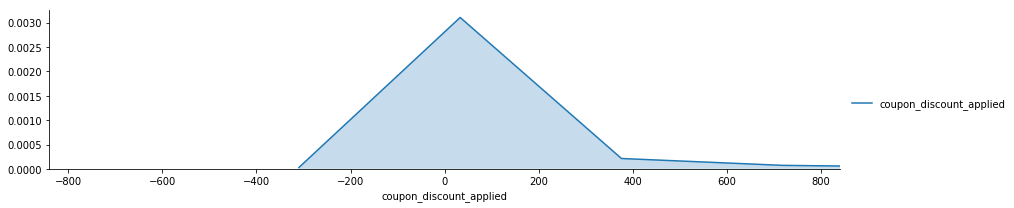

In [30]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'coupon_discount_applied',shade= True)
#g.set(xlim=(df['coupon_discount_applied'].min(), df['coupon_discount_applied'].max()))
g.set(xlim=(-df['coupon_discount_applied'].std(), df['coupon_discount_applied'].std()))
g.add_legend()

In [31]:
df.redpen_discount_used.describe()

count     46030.000000
mean        435.567699
std        1851.597072
min           0.000000
25%           0.000000
50%          54.480000
75%         253.677500
max      102653.770000
Name: redpen_discount_used, dtype: float64

In [32]:
df.redpen_discount_used.head(10)

0    4554.39
1     629.03
2    6269.71
3       0.00
4       0.00
5       0.00
6      94.59
7      85.45
8     251.58
9       0.00
Name: redpen_discount_used, dtype: float64

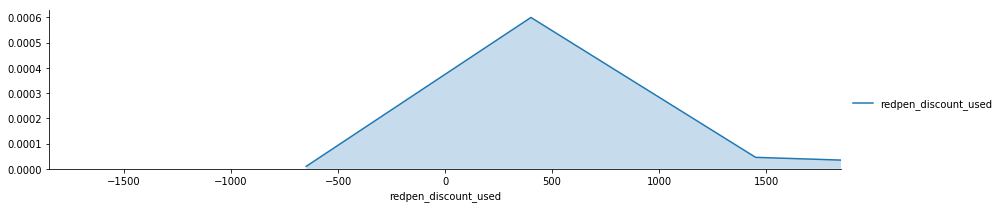

In [33]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'redpen_discount_used',shade= True)
#g.set(xlim=(df['redpen_discount_used'].min(), df['redpen_discount_used'].max()))
g.set(xlim=(-df['redpen_discount_used'].std(), df['redpen_discount_used'].std()))
g.add_legend()

**Note:**<br>
There are 43 columns in the data whereas the data definition according to the *README.md* file has 41 columns.<br>
The two new columns are *coupon_discount_applied* and *redpen_discount_used*.

**Assumptions:**<br>
Assuming "redpen/red pen discount" is the discount applied to provide the red coloured sale price of items in The Iconic's online shop.

Assuming *coupon_discount_applied* should be the number of times a discount coupon was applied in the transaction.<br>
Hence the data type should be integer instead of float.

Assuming *redpen_discount_used* should be the number of times a red pen discount was used.<br>
Hence the data type should be integer instead of float.

**Questions:**<br>
Is "redpen/red pen discount" an industry or The Iconic specific terminology?

### Clean - coupon_discount_applied

In [34]:
# Number of records with NaN values
df.coupon_discount_applied.isna().sum()

10204

In [35]:
# NaN doesn't make sense so convert them to zero and then to integer
df['coupon_discount_applied'] = df.coupon_discount_applied.round(0).fillna(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


### Clean - redpen_discount_used

In [36]:
# Number of records with NaN values
df.redpen_discount_used.isna().sum()

0

In [37]:
df['redpen_discount_used'] = df.redpen_discount_used.round(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6270,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,95,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,252,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0


In [38]:
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f995e7f49a537064d38399ad18a88d53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,136.335086,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.571844,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,745.752439,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.599754,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.000000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,33.000000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,254.000000,1.000000,791.

In [39]:
df.isna().sum()

afterpay_payments           0
android_orders              0
apple_payments              0
average_discount_onoffer    0
average_discount_used       0
cancels                     0
cc_payments                 0
coupon_discount_applied     0
curvy_items                 0
customer_id                 0
days_since_first_order      0
days_since_last_order       0
desktop_orders              0
devices                     0
different_addresses         0
female_items                0
home_orders                 0
ios_orders                  0
is_newsletter_subscriber    0
items                       0
macc_items                  0
male_items                  0
mapp_items                  0
mftw_items                  0
msite_orders                0
mspt_items                  0
orders                      0
other_collection_orders     0
other_device_orders         0
parcelpoint_orders          0
paypal_payments             0
redpen_discount_used        0
returns                     0
revenue   

## Stage 3: BUILD
### Labelling data for classification

In [40]:
# Let's look at some columns which have is specific to male or female items
# Note: The Iconic online shop show curvy items being only for women and not for men.
df_X = df[['male_items', 'female_items', 'mapp_items', 'wapp_items', 'mftw_items', 'wftw_items', 'macc_items', 'wacc_items', 'mspt_items', 'wspt_items', 'curvy_items']].copy()
df_X.head(10)

,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items
0,2,46,2,35,0,7,1,1,0,4,0
1,0,24,0,16,0,2,4,4,0,3,0
2,3,147,2,96,0,33,17,17,0,3,0
3,0,0,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,1,1,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0
7,0,1,1,1,0,0,0,0,0,0,0
8,0,11,0,6,0,3,3,3,0,0,0
9,0,1,0,0,0,1,0,0,0,0,0


### Assumption:
1. A customer is likely to purchase a product for themselves.<br>
That is, a male customer is likely purchase more male product than female products and vice versa.<br>
This assumption will be used to label the data 0 being female customers and 1 being male customer.


2. The women's fashion market is larger than men's so this will be reflected in the number of female customers versus male customers.<br>
Must keep this distribution in mind later when evalulating the model.

In [41]:
# Manually reduce the dimensions by summing the male product related columns and female product related columns.
df_assumption = pd.DataFrame()
df_assumption['female_sum'] = df_X['female_items'] + df_X['wapp_items'] + df_X['wftw_items'] + df_X['wacc_items'] + df_X['wspt_items'] + df_X['curvy_items']
df_assumption['male_sum'] = df_X['male_items'] + df_X['mapp_items'] + df_X['mftw_items'] + df_X['macc_items'] + df_X['mspt_items']
df_assumption.head(10)

,female_sum,male_sum
0,93,5
1,49,4
2,296,22
3,1,1
4,2,0
5,2,1
6,2,0
7,2,1
8,23,3
9,2,0


In [42]:
df_assumption['gender_inferred'] = np.where(df_assumption.female_sum >= df_assumption.male_sum , 0, 1)
df_assumption.tail(20)

,female_sum,male_sum,gender_inferred
46259,0,2,1
46260,0,4,1
46261,2,0,0
46262,8,0,0
46263,2,0,0
46264,2,0,0
46265,0,4,1
46266,2,0,0
46267,6,1,0
46268,26,0,0


In [43]:
# Ratio of Females to Males
print("Females : Males\n%d : %d" %(sum(df_assumption.gender_inferred == 0), df_assumption.gender_inferred.sum()))

Females : Males
34111 : 11919


The ratio shows the assumption made above is likely to be a realistic.

In [44]:
# Concatenate the two dataframes into one
#df_assumption.index = df_X.index
df_assumption = pd.concat([df_X, df_assumption], axis=1)
df_assumption.head(10)

,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,0,1,0,0,0,1,0,0,0,0,0,2,0,0


Text(0.5, 0.98, 'Correlation Heatmap')

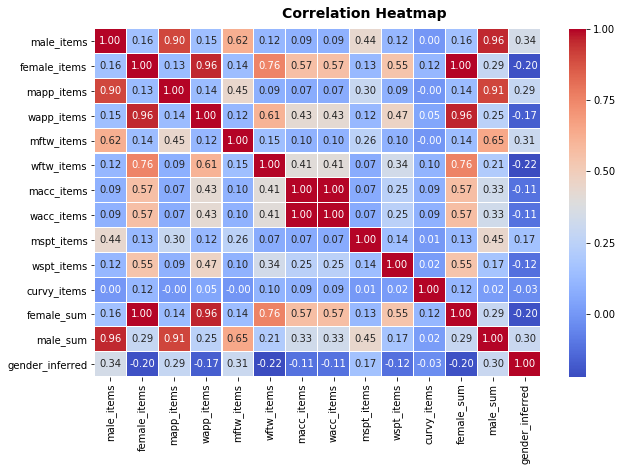

In [45]:
# Looking at a correlation matrix of the dataframe with inferred gender
corr = df_assumption.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

### Train and Test Set

In [46]:
# Specify the data 
X = df_assumption.iloc[:,0:13]

# Specify the target labels and flatten the array
y = df_assumption['gender_inferred']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Standardize the data

In [47]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### Model the data

In [48]:
# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(13, activation='relu', input_shape=(13,)))

# Add two hidden layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [49]:
# Model output shape
model.output_shape

(None, 1)

In [50]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Model config
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'units': 13,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'c

In [52]:
# List all weight tensors 
model.get_weights()

[array([[-0.33761352,  0.4241917 , -0.39390618, -0.17797309, -0.12523565,
          0.4207793 ,  0.15473926, -0.38359392, -0.09668186, -0.46240845,
         -0.16622469,  0.04712033, -0.22085604],
        [ 0.08493942, -0.17372507,  0.23647362,  0.2969461 ,  0.42109048,
         -0.2350338 , -0.31376716, -0.07053524,  0.11854935, -0.27722222,
          0.25183058, -0.00356895, -0.19739163],
        [ 0.1716516 , -0.24386244, -0.39794952,  0.33529425,  0.386149  ,
          0.22694242,  0.05229592, -0.01812926, -0.12849331,  0.46655238,
          0.32965636,  0.40996617, -0.22971788],
        [ 0.3300702 , -0.07129836, -0.36724895, -0.14590168,  0.42981136,
          0.2068817 ,  0.11707741,  0.05295402,  0.3266729 ,  0.3088867 ,
         -0.46473876, -0.28148502,  0.12862098],
        [ 0.15177184,  0.34076387,  0.11075288, -0.16517615,  0.26113313,
         -0.37204948, -0.24497214,  0.02081048,  0.1585272 , -0.2448252 ,
          0.2792523 , -0.02609041,  0.05268097],
        [-0.342

### Compile and Fit

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=90, batch_size=64, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
34522/34522 [==============================] - 1s 20us/step - loss: 0.3315 - acc: 0.9249
Epoch 2/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0472 - acc: 0.9874
Epoch 3/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0249 - acc: 0.9933
Epoch 4/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0142 - acc: 0.9961
Epoch 5/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0088 - acc: 0.9978
Epoch 6/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0061 - acc: 0.9987
Epoch 7/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0049 - acc: 0.9991
Epoch 8/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0036 - acc: 0.9994
Epoch 9/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0026 - acc: 0.9994
Epoch 10/90
34522/34522 [===========================

34522/34522 [==============================] - 1s 15us/step - loss: 4.9459e-06 - acc: 1.0000
Epoch 78/90
34522/34522 [==============================] - 1s 15us/step - loss: 4.2914e-06 - acc: 1.0000
Epoch 79/90
34522/34522 [==============================] - 1s 15us/step - loss: 4.0266e-06 - acc: 1.0000
Epoch 80/90
34522/34522 [==============================] - 1s 15us/step - loss: 3.8368e-06 - acc: 1.0000
Epoch 81/90
34522/34522 [==============================] - 1s 16us/step - loss: 3.7350e-06 - acc: 1.0000
Epoch 82/90
34522/34522 [==============================] - 1s 16us/step - loss: 3.0727e-06 - acc: 1.0000
Epoch 83/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0021 - acc: 0.9995
Epoch 84/90
34522/34522 [==============================] - 1s 15us/step - loss: 8.8039e-04 - acc: 0.9999
Epoch 85/90
34522/34522 [==============================] - 1s 15us/step - loss: 2.7807e-05 - acc: 1.0000
Epoch 86/90
34522/34522 [==============================] - 1s 16us/step

### Predict Values

In [54]:
y_pred = model.predict(X_test, batch_size=1)
y_pred[:5]

array([[7.7792200e-12],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4532575e-10],
       [1.0000000e+00]], dtype=float32)

In [55]:
y_test[:5]

32560    0
38299    1
41151    1
18314    0
15765    1
Name: gender_inferred, dtype: int64

### Evaluate Mode

In [56]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

11508/11508 [==============================] - 0s 17us/step
[0.0012762946951164133, 0.9998262078554049]


In [57]:
# Confusion matrix
y_pred = y_pred.round().astype(int)
confusion_matrix(y_test, y_pred)

array([[8569,    0],
       [   2, 2937]])

In [58]:
# Precision 
precision_score(y_test, y_pred)

1.0

In [59]:
# Recall
recall_score(y_test, y_pred)

0.9993194964273563

In [60]:
# F1 score
f1_score(y_test,y_pred)

0.9996596324029952

In [61]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.9995429463067953